In [19]:
from __future__ import division
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np


In [20]:
def show(image):
    plt.figure(figsize=(15, 15))
    plt.imshow(image, interpolation='nearest')
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [25]:
image=cv2.imread('strawberries_new.jpg')

In [26]:
image.shape

(590, 874, 3)

In [27]:
import pandas as pd
m,n,r =image.shape
arr=image.reshape(m*n,-1)
df=pd.DataFrame(arr,columns=['b','g','r'])
df.describe()

,b,g,r
count,515660.000000,515660.000000,515660.000000
mean,78.073915,116.505153,122.662078
std,63.423195,60.121340,59.204967
min,0.000000,0.000000,0.000000
25%,38.000000,78.000000,87.000000
50%,63.000000,114.000000,113.000000
75%,91.000000,144.000000,141.000000
max,255.000000,255.000000,255.000000


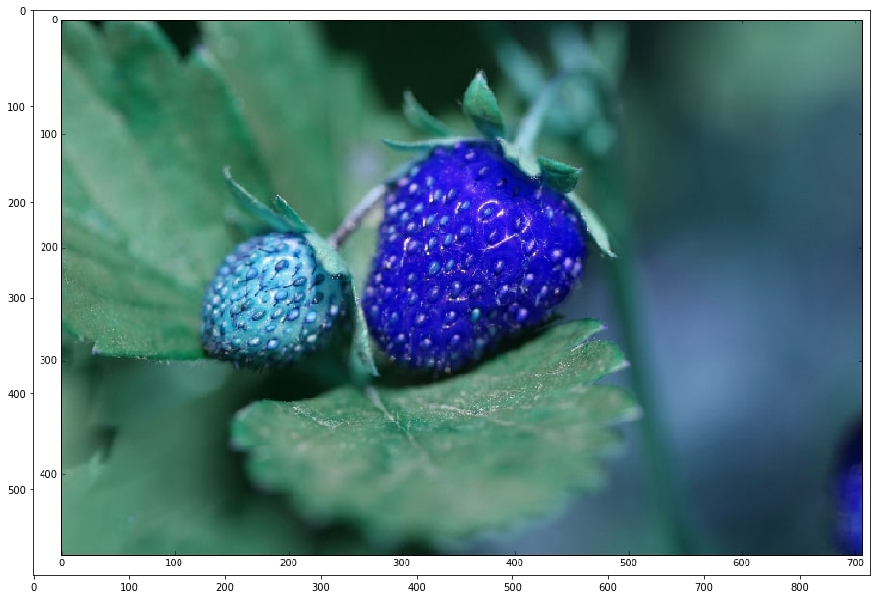

In [28]:
show(image)

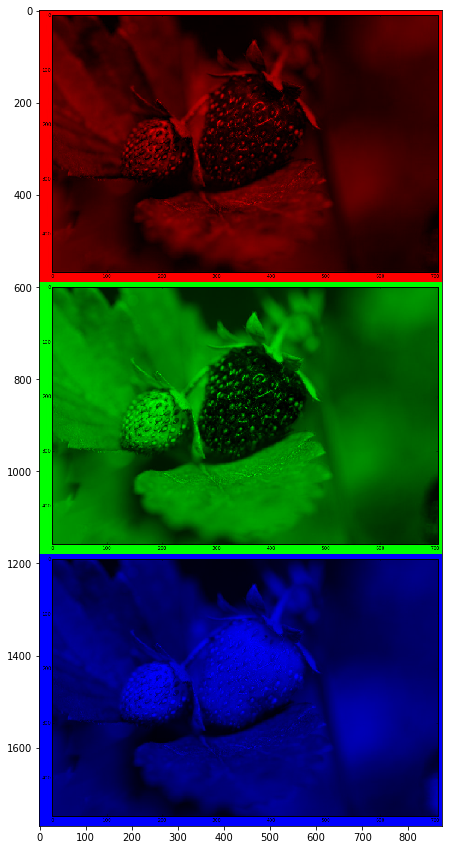

In [34]:
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: 
        colour[:,:,0] = 0
    if i != 1: 
        colour[:,:,1] = 0
    if i != 2: 
        colour[:,:,2] = 0
    images.append(colour)
show(np.vstack(images))

TypeError: only size-1 arrays can be converted to Python scalars

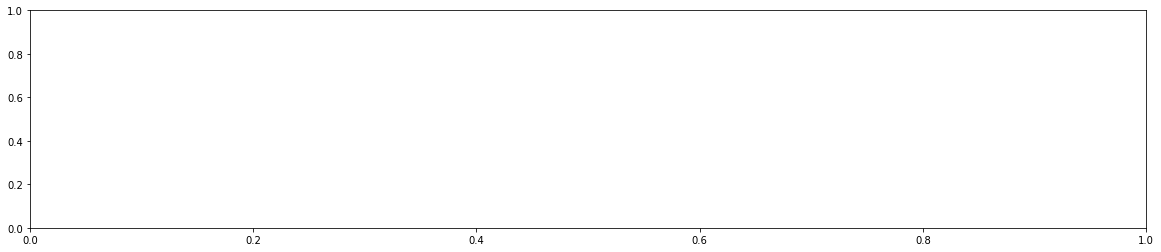

In [46]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
# plt.plot(histr, color=c, lw=2)

        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]

        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
# plt.xlim([0, 256])

        plt.show()

show_rgb_hist(image)

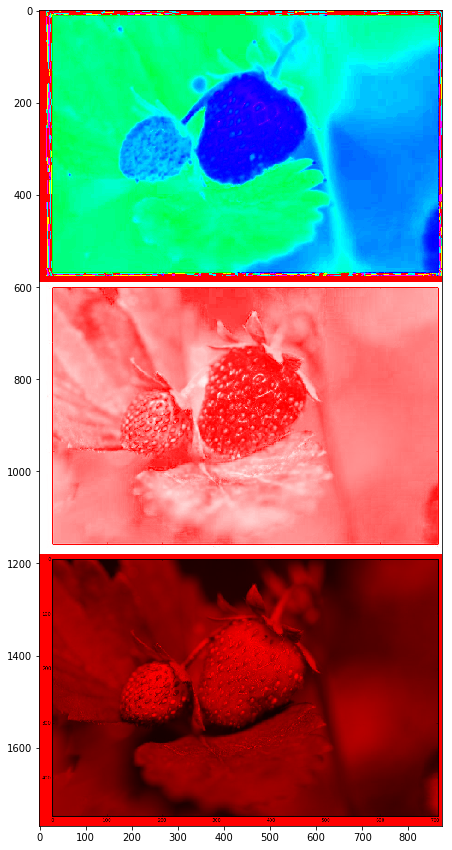

In [52]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)

    hsv_stack = np.vstack(images)
    rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

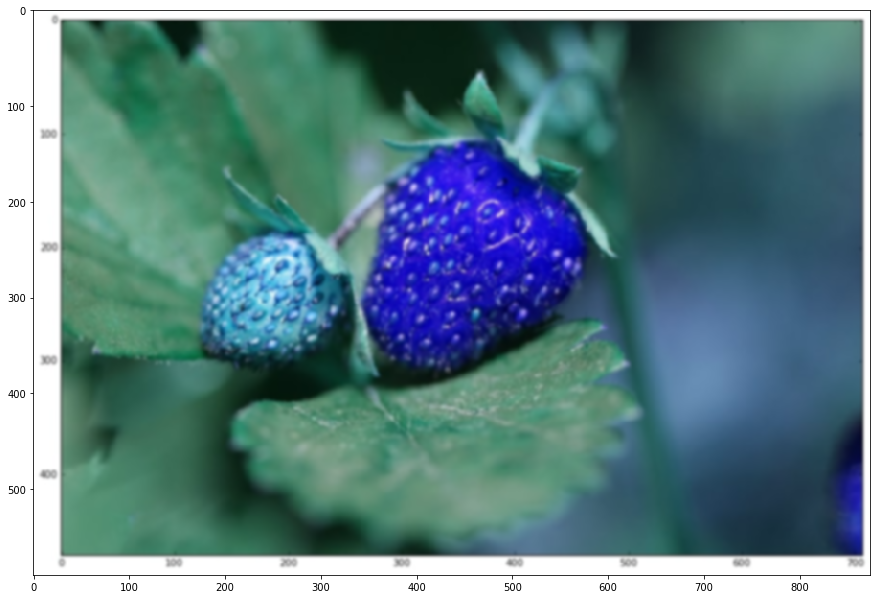

In [53]:
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

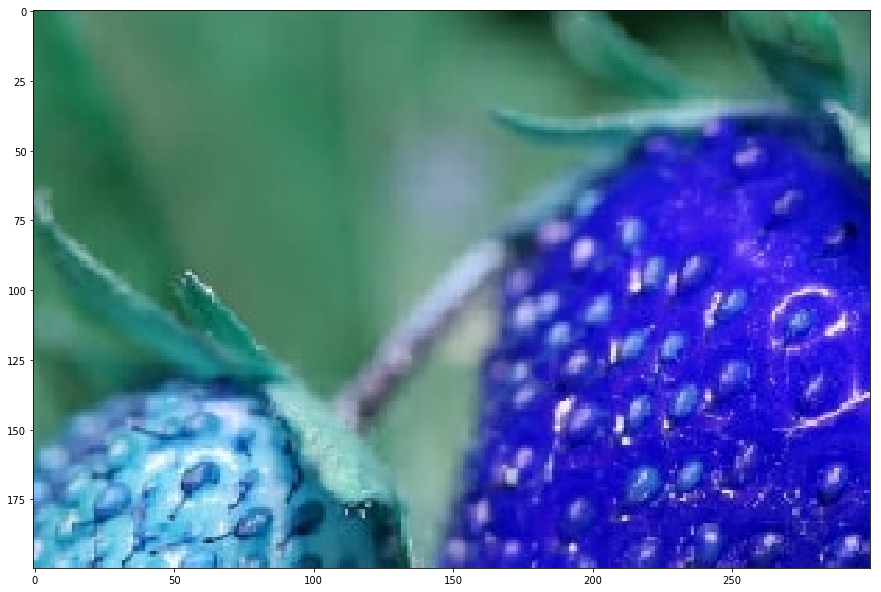

In [54]:
image_cropped=image[100:300,200:500]
sh


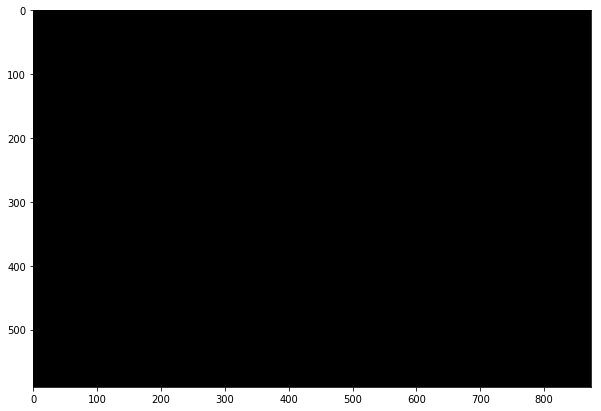

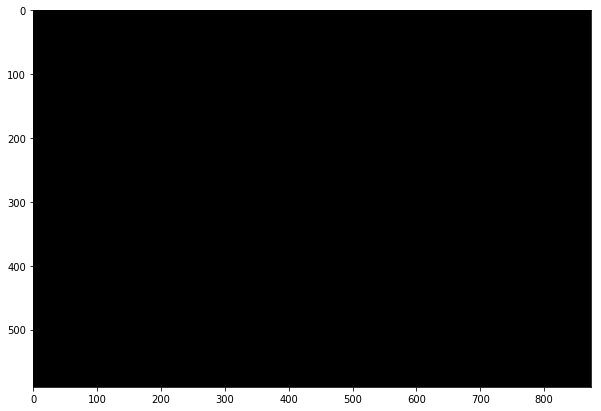

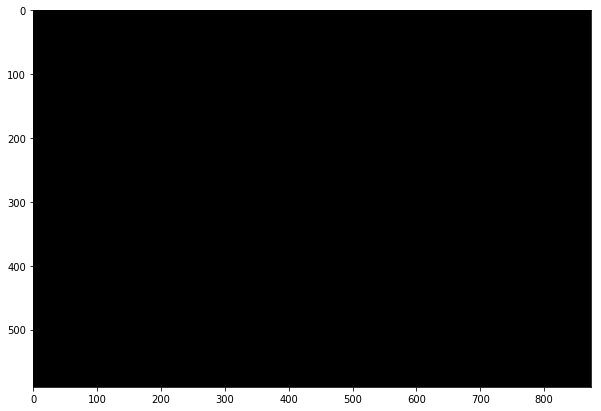

In [55]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

In [56]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)
show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)
<anubhav> kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)
<N> image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.resize(image,None,fx=1/3,fy=1/3)

SyntaxError: invalid syntax (<ipython-input-56-de09bb4e9d50>, line 17)